In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df_flights=pd.read_csv('/kaggle/input/dataset-of-agoda-hotels/flights.csv')
df_users=pd.read_csv('/kaggle/input/dataset-of-agoda-hotels/users.csv')
df_hotels=pd.read_csv('/kaggle/input/dataset-of-agoda-hotels/hotels.csv')
df_flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [3]:
df_hotels

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019
...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020


Observation: The dataset is relatively large so we are going to cut it down to smaller section for ease.

In [4]:
df_users

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
...,...,...,...,...,...
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52


In [5]:
df_users.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [7]:
df_users.set_index('code' , inplace=True)

In [8]:
df_users.duplicated().sum()

0

In [9]:
df_users.gender.value_counts(normalize=True)*100

gender
male      33.731343
female    33.432836
none      32.835821
Name: proportion, dtype: float64

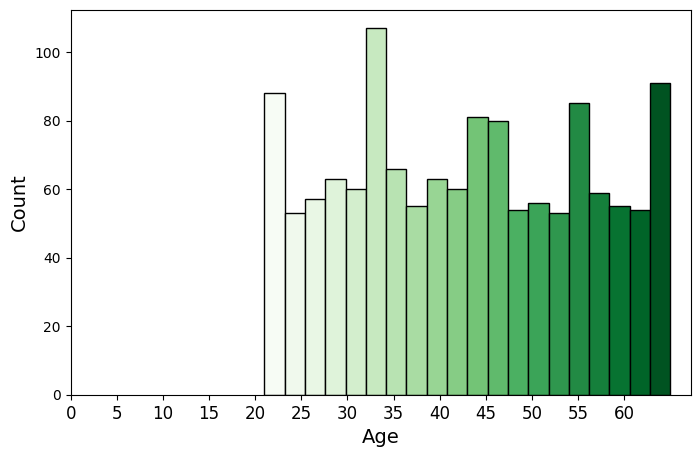

In [10]:
df_users.gender.value_counts(normalize=True)*100

plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df_users['age'], bins=20, edgecolor='black')
cmap = plt.get_cmap('Greens')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)
    
plt.xticks(ticks=np.arange(0, df_users['age'].max(), step=5), fontsize=12)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.show()

In [11]:
df_merged = pd.merge(df_users, df_hotels, left_on= 'code', right_on='userCode', how='inner')
df_merged.rename(columns={'name_x':'user_name','name_y':'hotel_name'}, inplace=True)

In [12]:
df_merged.describe()

,age,travelCode,userCode,days,price,total
count,40552.000000,40552.000000,40552.000000,40552.000000,40552.000000,40552.000000
mean,42.790615,67911.794461,666.963726,2.499679,214.439554,536.229513
std,12.942656,39408.199333,391.136794,1.119326,76.742305,319.331482
min,21.000000,0.000000,0.000000,1.000000,60.390000,60.390000
25%,32.000000,33696.750000,323.000000,1.000000,165.990000,247.620000
50%,42.000000,67831.000000,658.000000,2.000000,242.880000,495.240000
75%,54.000000,102211.250000,1013.000000,4.000000,263.410000,742.860000
max,65.000000,135942.000000,1339.000000,4.000000,313.020000,1252.080000


In [13]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.strftime('%Y-%m-%d')
df_merged

,company,user_name,gender,age,travelCode,userCode,hotel_name,place,days,price,total,date
0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26
1,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10
2,4You,Roy Braun,male,21,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14
3,4You,Roy Braun,male,21,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,2019-12-12
4,4You,Roy Braun,male,21,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,2019-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...
40547,Umbrella LTDA,Paul Rodriguez,male,35,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,2020-06-18
40548,Umbrella LTDA,Paul Rodriguez,male,35,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,2020-06-25
40549,Umbrella LTDA,Paul Rodriguez,male,35,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-02
40550,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,2020-07-09


In [14]:
df_merged.isna().sum()

company       0
user_name     0
gender        0
age           0
travelCode    0
userCode      0
hotel_name    0
place         0
days          0
price         0
total         0
date          0
dtype: int64

<Figure size 1200x600 with 0 Axes>

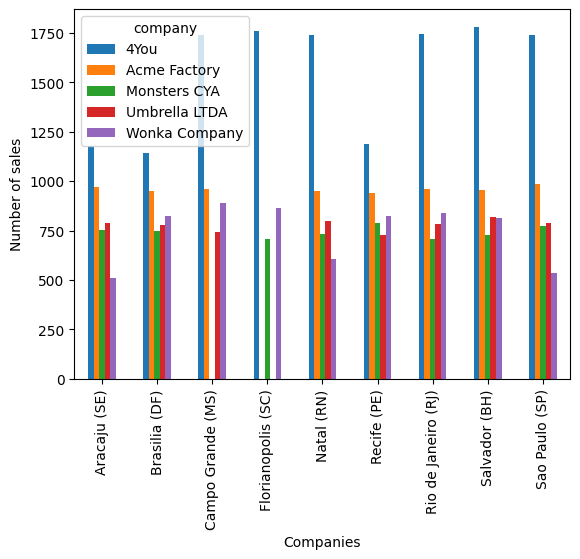

In [15]:
mean_sales = df_merged.groupby(['place'])['company'].value_counts().unstack()
plt.figure(figsize=(12,6))
mean_sales.plot(kind='bar')

plt.xlabel('Companies')
plt.ylabel('Number of sales')
plt.show()

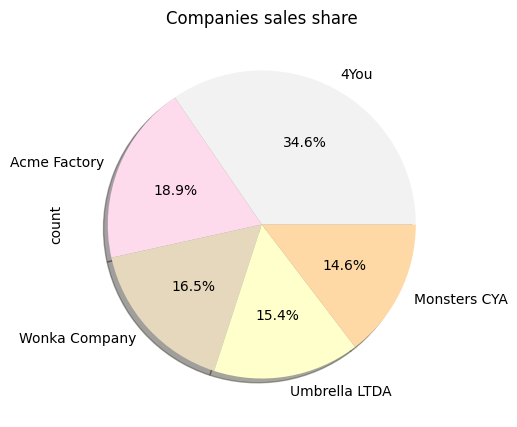

In [16]:
colors = plt.get_cmap('Pastel1_r').colors

df_merged.company.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,5), title='Companies sales share', 
                                    shadow=True , colors=colors)
plt.show()

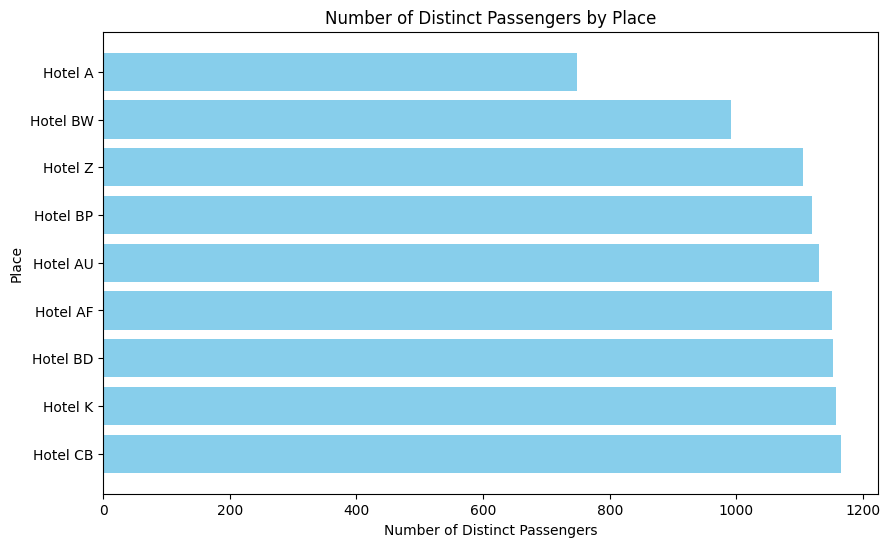

In [17]:
distinct_passengers = df_merged.groupby('hotel_name')['userCode'].nunique().reset_index()
distinct_passengers = distinct_passengers.sort_values(by='userCode', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(distinct_passengers['hotel_name'], distinct_passengers['userCode'], color='skyblue')

ax.set_xlabel('Number of Distinct Passengers')
ax.set_ylabel('Place')
ax.set_title('Number of Distinct Passengers by Place')

plt.show()

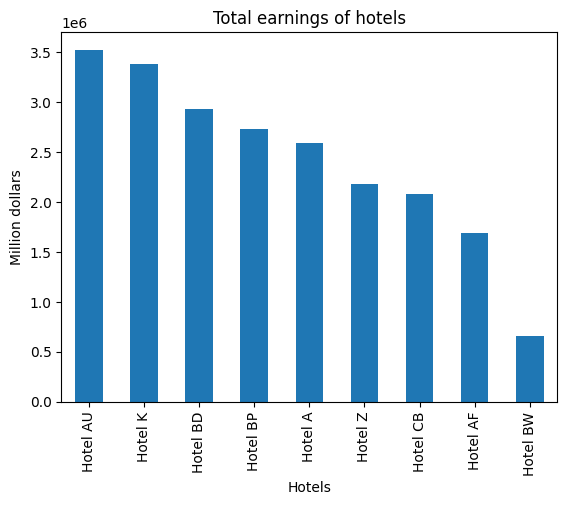

In [18]:
mean_sales = df_merged.groupby('hotel_name')['total'].sum()
mean_sales = mean_sales.sort_values(ascending=False)
mean_sales.plot(kind='bar')
plt.title('Total earnings of hotels')
plt.xlabel('Hotels')
plt.ylabel('Million dollars')
plt.show()

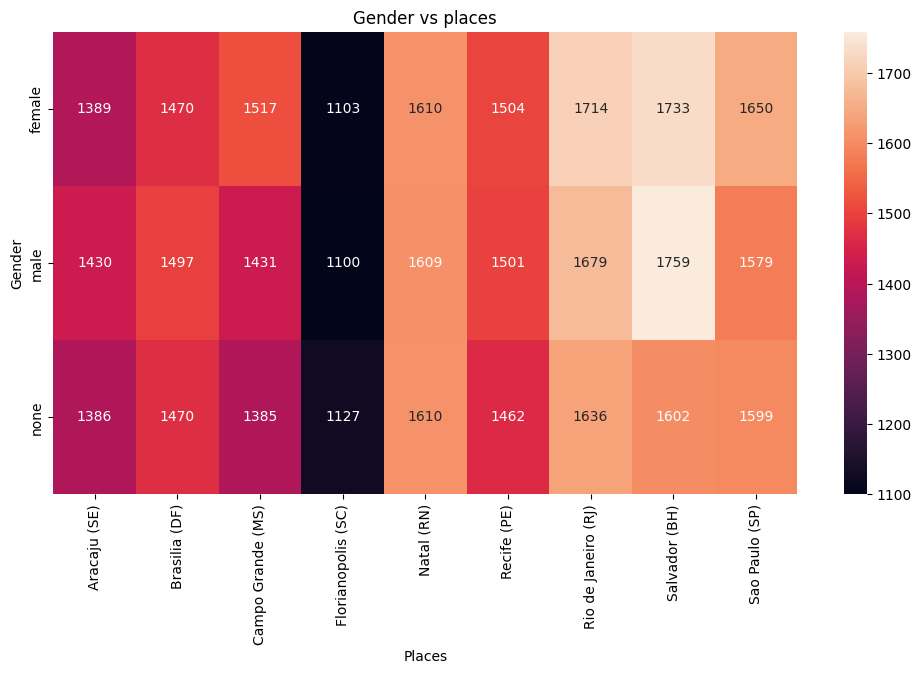

In [19]:
crosstab= pd.crosstab(df_merged['gender'] , df_merged['place']) 
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cbar=True ,edgecolor='black')

plt.title('Gender vs places')
plt.xlabel('Places')
plt.ylabel('Gender')

plt.show()

**Observation**: Florianopolis appears to be the least popular among all, males prefer Salvador (BH), and women Rio de Janeiro (RJ)

In [20]:
crosstab = pd.crosstab(df_merged['company'] , df_merged['days']) 
crosstab

days,1,2,3,4
company,,,,
4You,3426,3522,3514,3552
Acme Factory,1959,1877,1940,1889
Monsters CYA,1531,1474,1459,1474
Umbrella LTDA,1569,1553,1491,1616
Wonka Company,1686,1684,1704,1632


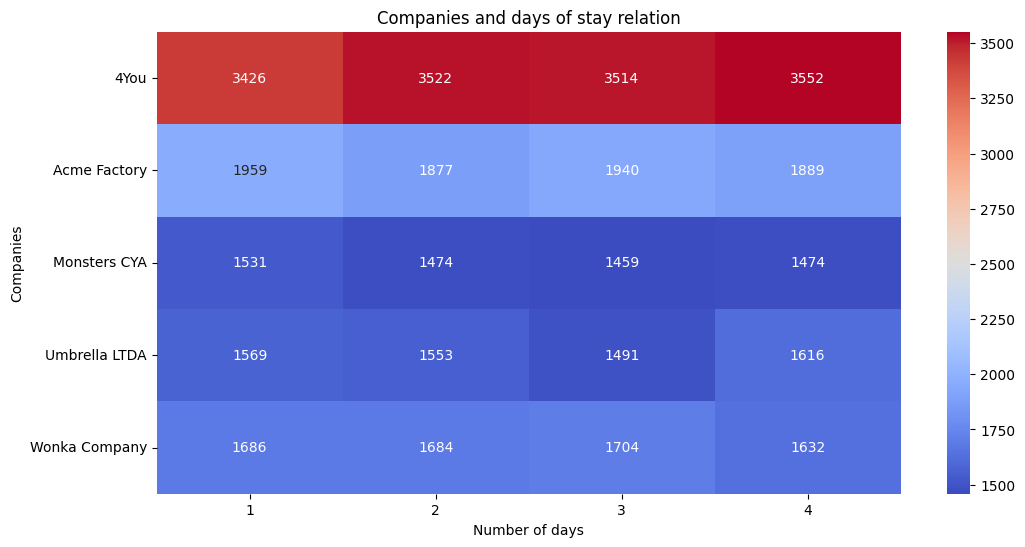

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cbar=True ,cmap="coolwarm")

plt.title('Companies and days of stay relation')
plt.xlabel('Number of days')
plt.ylabel('Companies')

plt.show()

In [22]:
df = pd.merge(df_merged, df_flights, on= 'travelCode', how='inner')
df

,company,user_name,gender,age,travelCode,userCode_x,hotel_name,place,days,price_x,...,date_x,userCode_y,from,to,flightType,price_y,time,distance,agency,date_y
0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,...,2019-09-26,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,...,2019-09-26,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,...,2019-10-10,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
3,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,...,2019-10-10,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019
4,4You,Roy Braun,male,21,7,0,Hotel K,Salvador (BH),3,263.41,...,2019-11-14,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,Umbrella LTDA,Paul Rodriguez,male,35,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,...,2020-07-02,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,07/05/2020
81100,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,...,2020-07-09,1339,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,07/09/2020
81101,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,...,2020-07-09,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
81102,Umbrella LTDA,Paul Rodriguez,male,35,135942,1339,Hotel BD,Natal (RN),4,242.88,...,2020-07-16,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020


In [23]:
df.describe()

,age,travelCode,userCode_x,days,price_x,total,userCode_y,price_y,time,distance
count,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000,81104.000000
mean,42.790615,67911.794461,666.963726,2.499679,214.439554,536.229513,666.963726,957.725281,1.424116,548.097771
std,12.942576,39407.956381,391.134383,1.119319,76.741832,319.329514,391.134383,362.212893,0.543071,209.053667
min,21.000000,0.000000,0.000000,1.000000,60.390000,60.390000,0.000000,301.510000,0.440000,168.220000
25%,32.000000,33696.750000,323.000000,1.000000,165.990000,247.620000,323.000000,672.660000,1.040000,401.660000
50%,42.000000,67831.000000,658.000000,2.000000,242.880000,495.240000,658.000000,899.600000,1.460000,562.140000
75%,54.000000,102211.250000,1013.000000,4.000000,263.410000,742.860000,1013.000000,1222.240000,1.760000,676.530000
max,65.000000,135942.000000,1339.000000,4.000000,313.020000,1252.080000,1339.000000,1754.170000,2.440000,937.770000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81104 entries, 0 to 81103
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     81104 non-null  object 
 1   user_name   81104 non-null  object 
 2   gender      81104 non-null  object 
 3   age         81104 non-null  int64  
 4   travelCode  81104 non-null  int64  
 5   userCode_x  81104 non-null  int64  
 6   hotel_name  81104 non-null  object 
 7   place       81104 non-null  object 
 8   days        81104 non-null  int64  
 9   price_x     81104 non-null  float64
 10  total       81104 non-null  float64
 11  date_x      81104 non-null  object 
 12  userCode_y  81104 non-null  int64  
 13  from        81104 non-null  object 
 14  to          81104 non-null  object 
 15  flightType  81104 non-null  object 
 16  price_y     81104 non-null  float64
 17  time        81104 non-null  float64
 18  distance    81104 non-null  float64
 19  agency      81104 non-nul

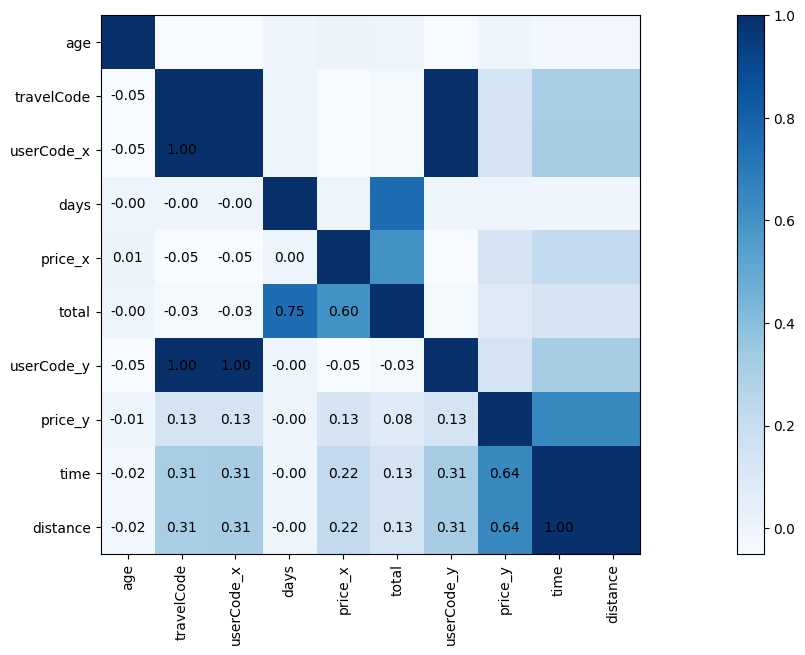

In [25]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(25, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

**Observation**: The longer the flight, the higher the fee.

In [26]:
df['date_y'] = pd.to_datetime(df['date_y'])
df['date_y'] = df['date_y'].dt.strftime('%Y-%m-%d')
df.rename(columns={'date_x':'booking_date','price_x':'room_price', 
                   'price_y':'flight_price', 'date_y':'flight_date'}, inplace=True)
df

,company,user_name,gender,age,travelCode,userCode_x,hotel_name,place,days,room_price,...,booking_date,userCode_y,from,to,flightType,flight_price,time,distance,agency,flight_date
0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,...,2019-09-26,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,...,2019-09-26,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,...,2019-10-10,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10
3,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,...,2019-10-10,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12
4,4You,Roy Braun,male,21,7,0,Hotel K,Salvador (BH),3,263.41,...,2019-11-14,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,Umbrella LTDA,Paul Rodriguez,male,35,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,...,2020-07-02,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,2020-07-05
81100,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,...,2020-07-09,1339,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,2020-07-09
81101,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,...,2020-07-09,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12
81102,Umbrella LTDA,Paul Rodriguez,male,35,135942,1339,Hotel BD,Natal (RN),4,242.88,...,2020-07-16,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16


In [27]:
df['time'].describe()

count    81104.000000
mean         1.424116
std          0.543071
min          0.440000
25%          1.040000
50%          1.460000
75%          1.760000
max          2.440000
Name: time, dtype: float64

<Axes: title={'center': 'Distribution of  Travel Type'}, ylabel='count'>

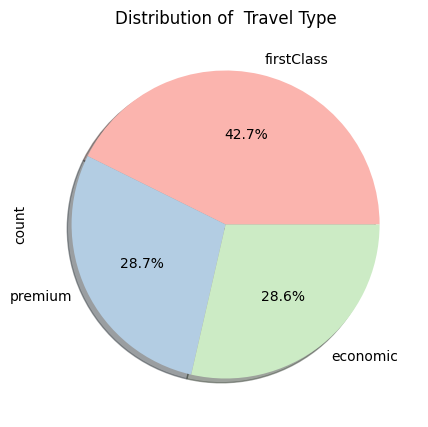

In [28]:
df['flightType'].value_counts()
colors = plt.get_cmap('Pastel1').colors
df['flightType'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5), title='Distribution of  Travel Type', shadow=True , colors=colors)

**Observation**: amazingly the majority of passengers prefer to fly in Business and Premium classes, rather than economy.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

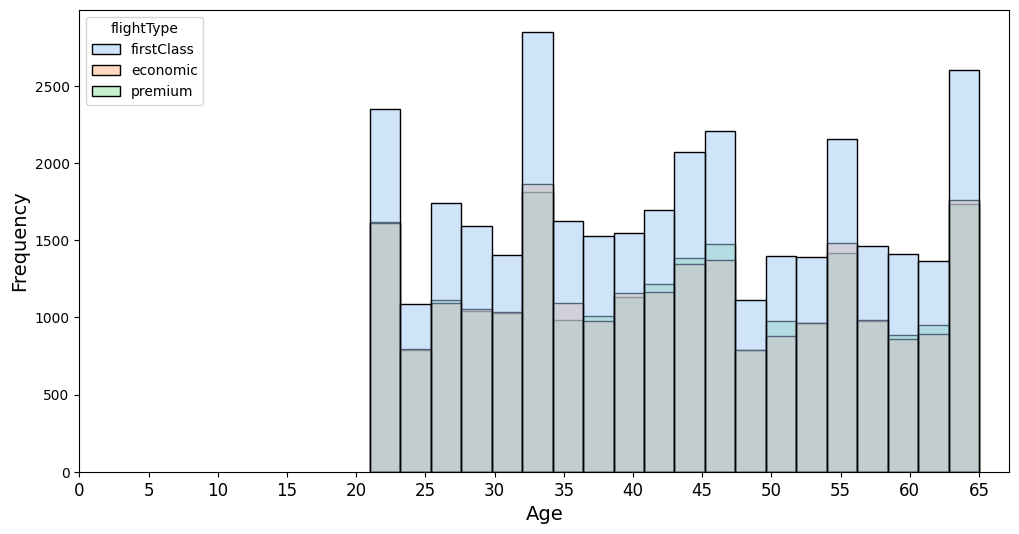

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=20, edgecolor='black', hue='flightType',  palette="pastel")
plt.xticks(ticks=np.arange(0, df['age'].max() + 5, step=5), fontsize=12)
plt.xlabel('Age', fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

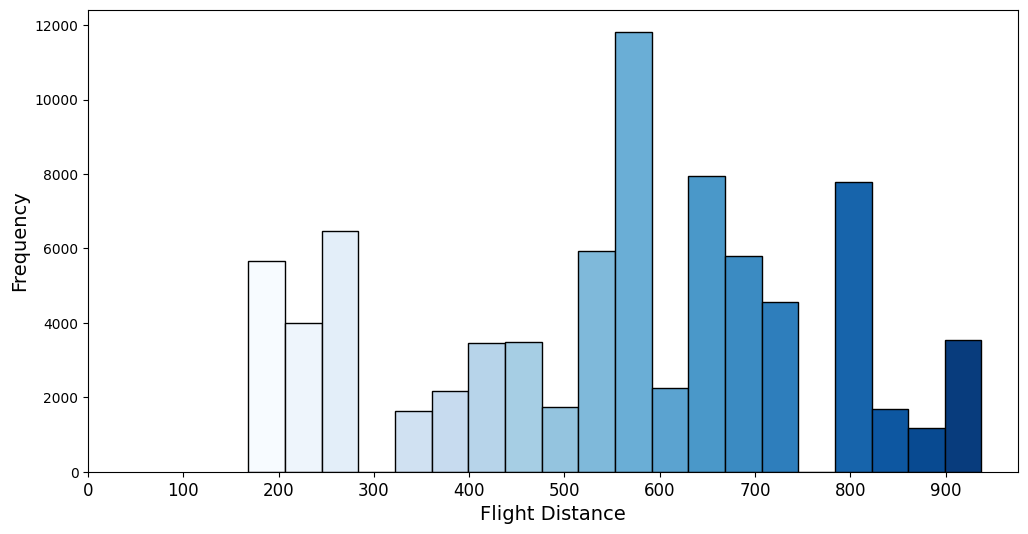

In [30]:
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(df['distance'], bins=20, edgecolor='black')
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)
    
plt.xticks(ticks=np.arange(0, df['distance'].max(), step=100), fontsize=12)
plt.xlabel("Flight Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

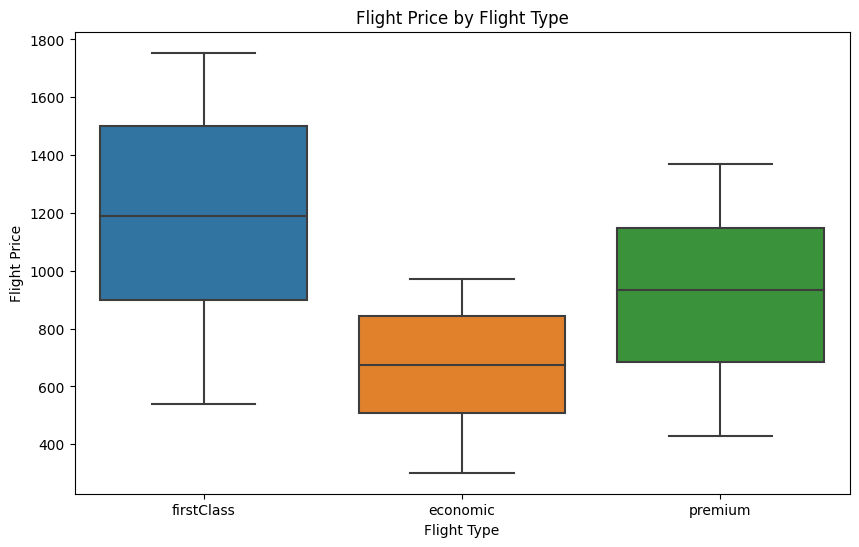

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='flightType', y='flight_price', data=df)

plt.xlabel('Flight Type')
plt.ylabel('Flight Price')
plt.title('Flight Price by Flight Type')

plt.show()

In [32]:
cut_series = pd.cut(df['distance'], bins=[0, 200, 400, 600, 800, 1000], 
                    labels=['0-200', '200-400', '400-600', '600-800', '800-1000'])
value_counts = cut_series.value_counts()

percentage_distribution = (value_counts / df['distance'].shape[0]).mul(100).round(2)

print("Distribution (Counts):")
print(value_counts)
print("\nDistribution (Percentage):")
print(percentage_distribution)

Distribution (Counts):
distance
400-600     28678
600-800     19444
200-400     14280
800-1000    13042
0-200        5660
Name: count, dtype: int64

Distribution (Percentage):
distance
400-600     35.36
600-800     23.97
200-400     17.61
800-1000    16.08
0-200        6.98
Name: count, dtype: float64


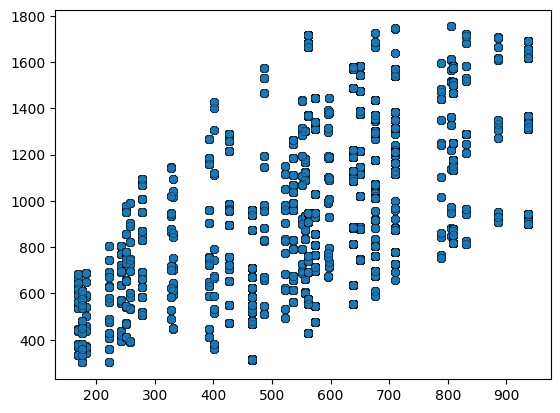

In [33]:
plt.scatter(df['distance'], 
            df['flight_price'], alpha = 0.5 , 
            linewidths=0.3 ,edgecolors='black')

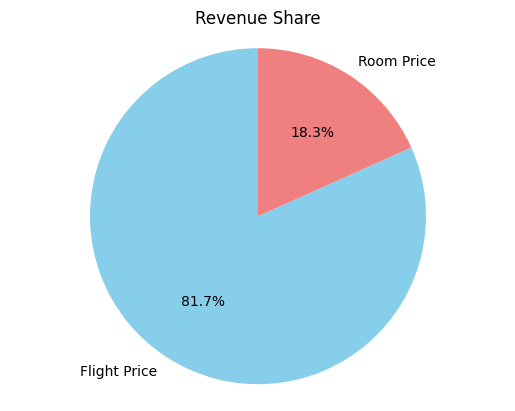

In [34]:
df['total_earning'] = df['room_price']+df['flight_price']
labels = ['Flight Price', 'Room Price']
total_flight_cost = df['flight_price'].sum()
total_room_cost = df['room_price'].sum()
sizes = [total_flight_cost, total_room_cost]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
ax.axis('equal')
plt.title('Revenue Share')

plt.show()

In [35]:
df['route'] = df['from']+' - '+df['to']
df['route'].head(10)

0    Recife (PE) - Florianopolis (SC)
1    Florianopolis (SC) - Recife (PE)
2        Aracaju (SE) - Salvador (BH)
3        Salvador (BH) - Aracaju (SE)
4        Aracaju (SE) - Salvador (BH)
5        Salvador (BH) - Aracaju (SE)
6       Brasilia (DF) - Salvador (BH)
7       Salvador (BH) - Brasilia (DF)
8    Recife (PE) - Florianopolis (SC)
9    Florianopolis (SC) - Recife (PE)
Name: route, dtype: object

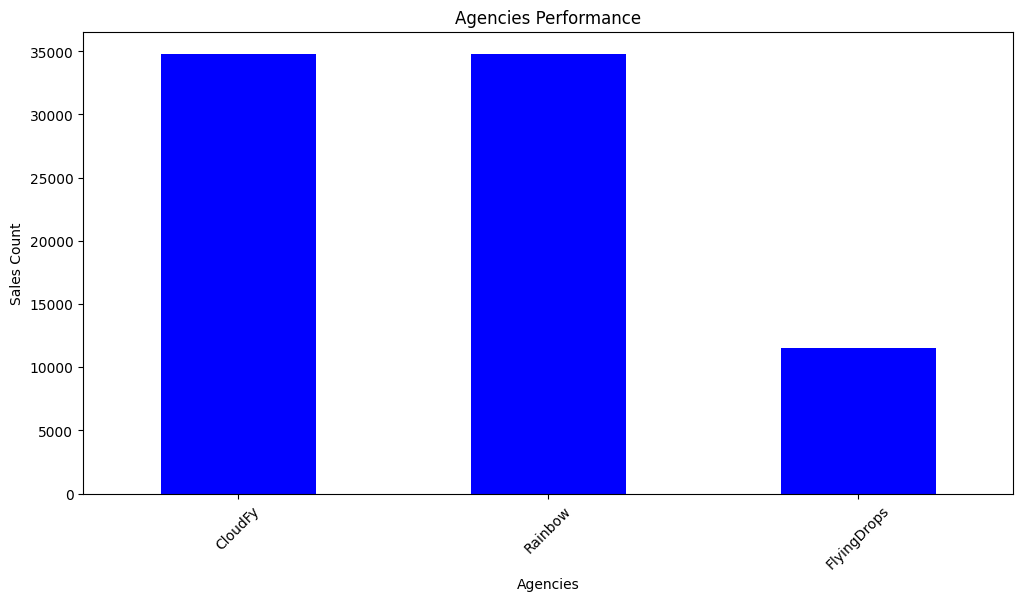

In [36]:
passenger_count = df['agency'].value_counts()
top_10_destinations = passenger_count.head(10)
plt.figure(figsize=(12, 6))
top_10_destinations.plot(kind='bar', color='blue')
plt.xlabel('Agencies')
plt.ylabel('Sales Count')
plt.title('Agencies Performance')
plt.xticks(rotation=45)

plt.show()

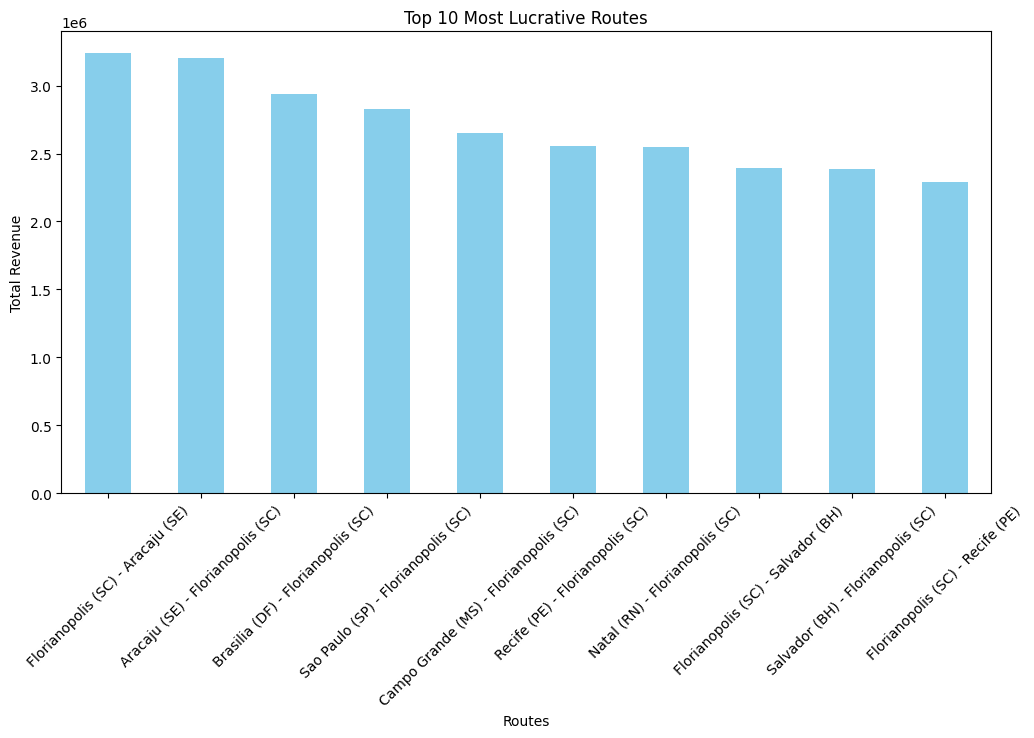

In [37]:
total_revenue = df.groupby('route')['flight_price'].sum()
top_10_destinations_revenue = total_revenue.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_destinations_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Routes')
plt.ylabel('Total Revenue')
plt.title('Top 10 Most Lucrative Routes')

plt.xticks(rotation=45)

plt.show()

In [38]:
df

,company,user_name,gender,age,travelCode,userCode_x,hotel_name,place,days,room_price,...,from,to,flightType,flight_price,time,distance,agency,flight_date,total_earning,route
0,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,...,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,1747.40,Recife (PE) - Florianopolis (SC)
1,4You,Roy Braun,male,21,0,0,Hotel A,Florianopolis (SC),4,313.02,...,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,1605.31,Florianopolis (SC) - Recife (PE)
2,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,...,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,1947.46,Aracaju (SE) - Salvador (BH)
3,4You,Roy Braun,male,21,2,0,Hotel K,Salvador (BH),2,263.41,...,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12,1795.33,Salvador (BH) - Aracaju (SE)
4,4You,Roy Braun,male,21,7,0,Hotel K,Salvador (BH),3,263.41,...,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,2019-11-14,1228.24,Aracaju (SE) - Salvador (BH)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,Umbrella LTDA,Paul Rodriguez,male,35,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,...,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,2020-07-05,1401.60,Campo Grande (MS) - Florianopolis (SC)
81100,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,...,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,2020-07-09,1009.97,Florianopolis (SC) - Campo Grande (MS)
81101,Umbrella LTDA,Paul Rodriguez,male,35,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,...,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12,1506.73,Campo Grande (MS) - Florianopolis (SC)
81102,Umbrella LTDA,Paul Rodriguez,male,35,135942,1339,Hotel BD,Natal (RN),4,242.88,...,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16,969.83,Florianopolis (SC) - Natal (RN)
